# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

<ipython-input-2-bfbc7cd960cb>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [ ]:
# Q1
pd.set_option('display.max_columns', None)
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [ ]:
# Q2
df.isna().sum()

id                                      0
host_response_time                  19006
host_response_rate                  19006
host_acceptance_rate                14015
host_is_superhost                       5
host_listings_count                     5
host_total_listings_count               5
host_verifications                      0
host_has_profile_pic                    5
host_identity_verified                  5
neighborhood                            0
latitude                                0
longitude                               0
is_location_exact                       0
property_type                           0
room_type                               0
accommodates                            0
bathrooms                              54
bedrooms                               77
beds                                  482
bed_type                                0
amenities                               0
square_feet                         50407
price                             

In [ ]:
#Q2
na_percent = df.isna().sum() / len(df) *100
na_count = df.isna().sum().sort_values(ascending=False)[na_percent != 0]
na_df = pd.DataFrame({'Column': na_count.index, 'na_count': na_count.values, 'na_percent' : na_percent.values[na_percent.values != 0]})
na_df

,Column,na_count,na_percent
0,jurisdiction_names,50781,37.416332
1,license,50759,37.416332
2,square_feet,50407,27.590755
3,monthly_price,46119,0.009843
4,weekly_price,45411,0.009843
5,host_response_rate,19006,0.009843
6,host_response_time,19006,0.009843
7,security_deposit,17325,0.009843
8,host_acceptance_rate,14015,0.106308
9,review_scores_location,11482,0.151587


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

Text(0.5, 1.0, 'na_percent by Column')

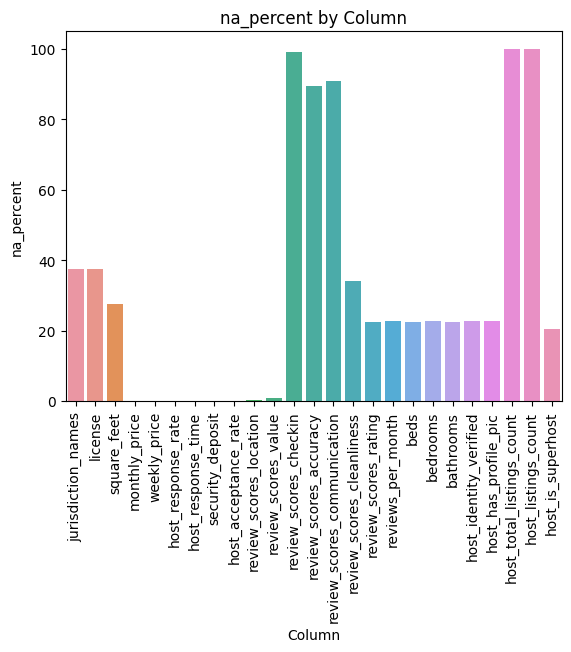

In [ ]:
# Q3
sns.barplot(x = 'Column', y = 'na_percent', data = na_df)
plt.xticks(rotation='vertical')
plt.title('na_percent by Column')

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [ ]:
# Q4
df[df['beds'].isna()].head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [ ]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [ ]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

Text(0.5, 1.0, 'room type countplot')

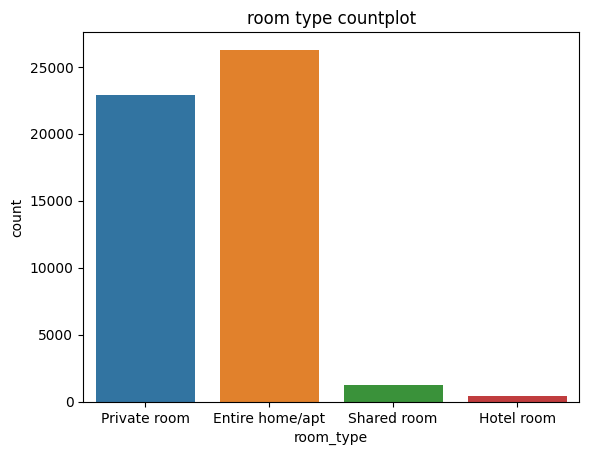

In [ ]:
# Q5
sns.countplot(x = 'room_type', data = df)
plt.title('room type countplot')

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

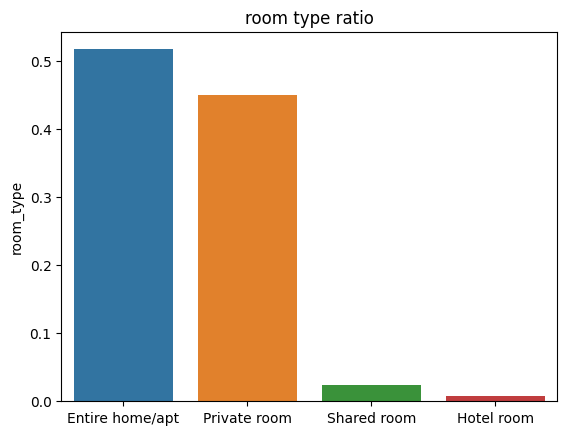

In [ ]:
# Q6
room_type_ratio = df['room_type'].value_counts(normalize=True)
room_type_ratio = pd.DataFrame({'room_type': room_type_ratio.index, 'ratio': room_type_ratio.values})
sns.barplot(x='room_type', y='ratio', data=room_type_ratio)
plt.title('room type ratio')
plt.xlabel('')
plt.ylabel('room_type')
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

Text(0.5, 1.0, 'room types in neighborhood')

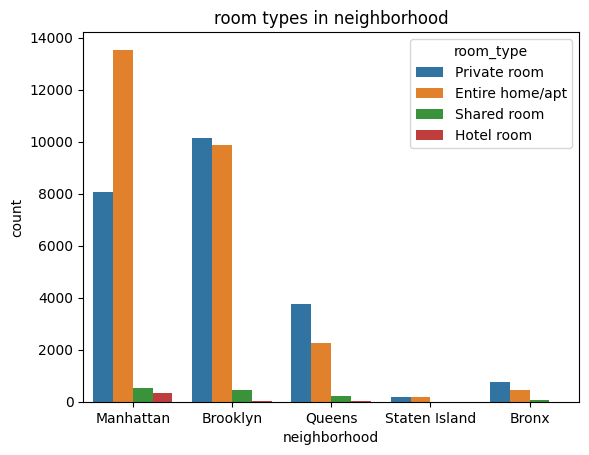

In [ ]:
# Q7
sns.countplot(x = 'neighborhood', data = df, hue = 'room_type')
plt.title('room types in neighborhood')

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

Text(0.5, 1.0, 'room price in neighborhood')

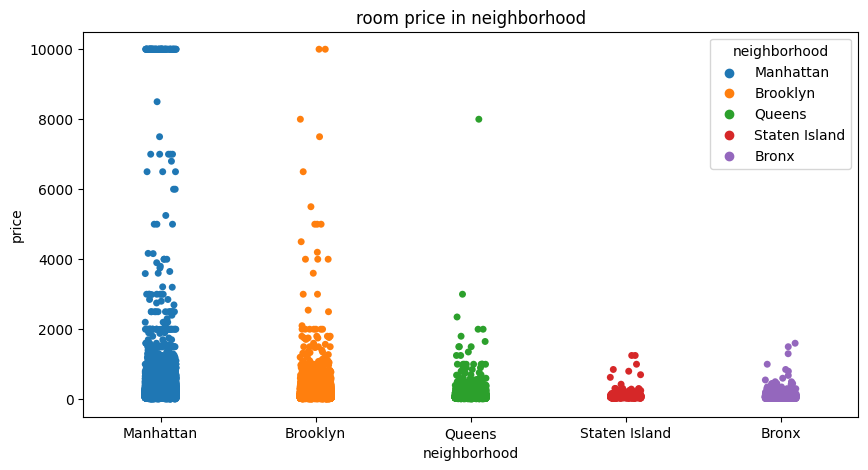

In [ ]:
# Q8
plt.figure(figsize=(10, 5))
sns.stripplot(x = 'neighborhood', y = 'price', data = df, hue='neighborhood')
plt.title('room price in neighborhood')

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [ ]:
# Q9
# Q5, Q6의 countplot + barplot -> airbnb 내에 등록된 숙소들 중 대다수가 private room, apartment의 형태를 띄고 있음.
# Q7의 countplot -> Manhattan에는 Entire home / apt의 숙소 형태가 Private room보다 많이 존재.
# Q8의 stripplot -> 이상치의 존재를 배제한다면 각 지역마다의 숙소 price 분포 차이는 크지 않지만, Manhattan과 Brooklyn의 경우 타 지역에는 존재하지 않는 고가의 숙소가 여럿 존재함.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

Text(0.5, 1.0, 'accommodates histogram')

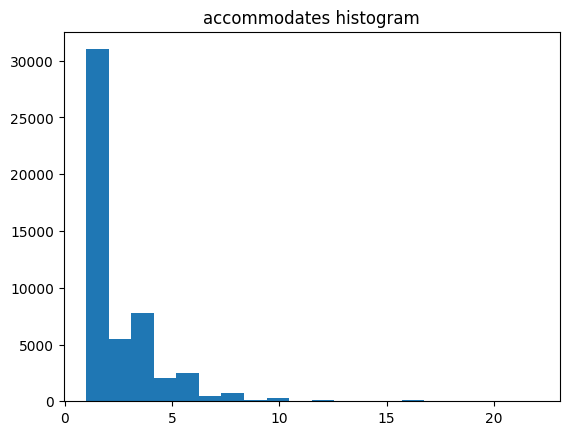

In [ ]:
# Q10
plt.hist(x = 'accommodates', data = df, bins = 20)
plt.title('accommodates histogram')

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

Text(0.5, 1.0, 'price histogram')

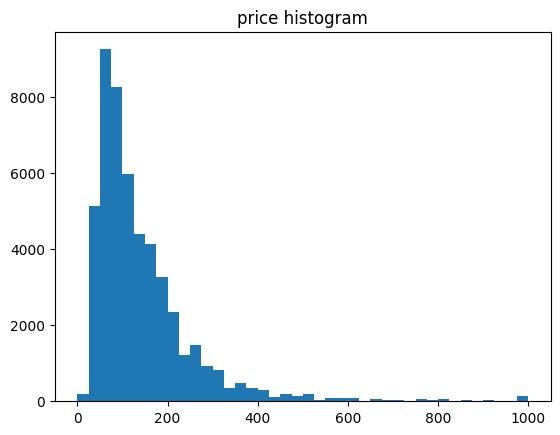

In [ ]:
# Q11
plt.hist(x = 'price', data = df, range = (0,1000), bins = 40)
plt.title('price histogram')

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [116]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

<ipython-input-116-bfbc7cd960cb>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [117]:
# Q2에서와 같이, na_df dataframe 만들기
na_percent = df.isna().sum() / len(df)
na_count = df.isna().sum().sort_values(ascending=False)[na_percent != 0]
na_df = pd.DataFrame({'Column': na_count.index, 'na_count': na_count.values, 'na_percent' : na_percent.values[na_percent.values != 0]})

# for loop를 이용해 해당 조건에 맞게 df 결측값 처리
drop_col = []

for index, row in na_df.iterrows():
    if row['na_percent'] >= 0.25:
        drop_col.append(row['Column'])
    elif 0.10 <= row['na_percent'] < 0.25:
        df = df.dropna(subset=[row['Column']])
    else:
        df[row['Column']] = df[row['Column']].apply(lambda x: pd.to_numeric(str(x).replace('$', '').replace(',', ''), errors='coerce'))  # 대상 column의 값들 중, string data type을 가진 column의 data type을 numerical하게 바꾸고, 그것이 불가능한 경우 처리하지 않은 상태로 보류
        df[row['Column']].fillna(df[row['Column']].median(), inplace=True)

df = df.drop(columns=drop_col)
df
# 이후 처리되지 않은 결측값을 0으로 fill하는 등의 추가 전처리가 필요할 것

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
1,2595,NaN,NaN,NaN,f,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,1995.0,2400.0,350.0,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,NaN,NaN,NaN,f,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89,575.0,2100.0,500.0,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,10.0,8.0,f,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,NaN,f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,700.0,2400.0,300.0,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,f,f,f,moderate,t,t,0.59
6,5178,NaN,NaN,NaN,f,"['email', 'phone', 'facebook', 'reviews']",t,f,Manhattan,40.76489,-73.98493,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",79,470.0,2400.0,100.0,1,$12.00,2,14,t,18,21,27,207,470,54,84.0,10.0,8.0,f,f,f,strict_14_with_grace_period,f,f,3.56
7,5203,NaN,NaN,NaN,f,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,Manhattan,40.80178,-73.96723,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",79,700.0,2400.0,100.0,1,$0.00,2,14,t,0,0,0,0,118,0,98.0,10.0,10.0,f,f,f,flexible,t,t,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,42750206,NaN,NaN,NaN,f,"['phone', 'offline_government_id', 'selfie', '...",t,f,Queens,40.74024,-73.82093,t,Villa,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",39,700.0,2400.0,0.0,1,$0.00,1,1125,t,28,58,88,88,1,1,100.0,10.0,10.0,f,t,f,moderate,f,f,1.00
50526,42762152,NaN,NaN,NaN,f,"['email', 'phone']",t,f,Brooklyn,40.68645,-73.93803,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",""Smoke detecto...",80,700.0,2400.0,100.0,1,$0.00,2,21,t,28,58,88,363,1,1,100.0,10.0,10.0,f,t,f,flexible,f,f,1.00
50598,42794256,NaN,NaN,NaN,f,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.83212,-73.94180,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",55,700.0,2400.0,150.0,2,$100.00,1,1125,t,0,23,53,328,2,2,100.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,2.00
50650,42816035,NaN,NaN,NaN,f,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.76166,-73.99113,t,Condominium,Entire home/apt,3,1.5,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,""S...",180,700.0,2400.0,100.0,1,$0.00,21,1125,t,28,58,88,363,1,1,100.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,1.00


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [118]:
#Q13-1)
# review_scores column들에 대한 Min-Max scaling

from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

# for loop를 이용해 'review_scores_'로 시작하는 column들에 대한 minmax scaling 진행
for column in df.columns:
    if column.startswith('review_scores_'):
        mm_scaler.fit_transform(df[column].values.reshape(-1, 1))
        df[f'scaled_{column}'] = mm_scaler.transform(df[column].values.reshape(-1, 1))
df

# review_score들과 타 변수들 간 연관관계에 대해 분석하거나 관련 모델을 학습시킬 때, 모든 항목에 대한 review_score들에 대해 같은 범위의 척도를 설정해 시각화 및 분석 결과를 용이하게 하기 위함

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,scaled_review_scores_rating,scaled_review_scores_location,scaled_review_scores_value
1,2595,NaN,NaN,NaN,f,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,1995.0,2400.0,350.0,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38,0.925,1.0,0.875
2,3831,NaN,NaN,NaN,f,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89,575.0,2100.0,500.0,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,10.0,8.0,f,f,f,moderate,f,f,4.71,0.875,1.0,0.750
3,5099,NaN,NaN,NaN,f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,700.0,2400.0,300.0,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,f,f,f,moderate,t,t,0.59,0.875,1.0,0.875
6,5178,NaN,NaN,NaN,f,"['email', 'phone', 'facebook', 'reviews']",t,f,Manhattan,40.76489,-73.98493,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",79,470.0,2400.0,100.0,1,$12.00,2,14,t,18,21,27,207,470,54,84.0,10.0,8.0,f,f,f,strict_14_with_grace_period,f,f,3.56,0.800,1.0,0.750
7,5203,NaN,NaN,NaN,f,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,Manhattan,40.80178,-73.96723,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",79,700.0,2400.0,100.0,1,$0.00,2,14,t,0,0,0,0,118,0,98.0,10.0,10.0,f,f,f,flexible,t,t,0.92,0.975,1.0,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,42750206,NaN,NaN,NaN,f,"['phone', 'offline_government_id', 'selfie', '...",t,f,Queens,40.74024,-73.82093,t,Villa,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",39,700.0,2400.0,0.0,1,$0.00,1,1125,t,28,58,88,88,1,1,100.0,10.0,10.0,f,t,f,moderate,f,f,1.00,1.000,1.0,1.000
50526,42762152,NaN,NaN,NaN,f,"['email', 'phone']",t,f,Brooklyn,40.68645,-73.93803,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",""Smoke detecto...",80,700.0,2400.0,100.0,1,$0.00,2,21,t,28,58,88,363,1,1,100.0,10.0,10.0,f,t,f,flexible,f,f,1.00,1.000,1.0,1.000
50598,42794256,NaN,NaN,NaN,f,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.83212,-73.94180,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",55,700.0,2400.0,150.0,2,$100.00,1,1125,t,0,23,53,328,2,2,100.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,2.00,1.000,1.0,1.000
50650,42816035,NaN,NaN,NaN,f,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.76166,-73.99113,t,Condominium,Entire home/apt,3,1.5,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,""S...",180,700.0,2400.0,100.0,1,$0.00,21,1125,t,28,58,88,363,1,1,100.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,1.00,1.000,1.0,1.000


In [119]:
#Q13-2)
# neighborhood column에 대한 label encoding
df.neighborhood.value_counts()

Manhattan        16581
Brooklyn         16291
Queens            4988
Bronx              992
Staten Island      311
Name: neighborhood, dtype: int64

In [120]:
# neighborhood column에 대한 label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoded = encoder.fit_transform(df['neighborhood'])
df['neighborhood'] = encoded
df.neighborhood.value_counts()
# 0 : Bronx, 1 : Brooklyn, 2 : Manhattan, 3 : Queens, 4 : Staten Island

# price, number_of_reviews, amenities의 개수, security_deposit 등을 통해 neighborhood의 종류를 예측하는 model을 훈련시킬 때 label encoding이 사용될 수 있을 것으로 보임

2    16581
1    16291
3     4988
0      992
4      311
Name: neighborhood, dtype: int64

In [121]:
#Q13-3)
# room_type에 대한 one-hot encoding
pd.get_dummies(df['room_type'])

# 위와 같은 논리로, neighborhood, amenities의 개수, availability_365의 값 등을 통해 room_type의 종류를 예측하는 model을 훈련시킬 때 one-hot encoding이 사용될 수 있을 것으로 보임

,Entire home/apt,Hotel room,Private room,Shared room
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
6,0,0,1,0
7,0,0,1,0
...,...,...,...,...
50490,0,0,1,0
50526,0,0,1,0
50598,0,0,1,0
50650,1,0,0,0


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
